# SetUP

In [8]:
setwd("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/stripes/shuf/obs_exp.MAT/")

In [9]:
suppressPackageStartupMessages({
library(dplyr)
library(tidyverse)
library(data.table)
library(ggplot2)
library(edgeR)
library(RColorBrewer)
library(GenomicRanges)
library(ComplexHeatmap)
library(Signac)
#library(rtracklayer)
#library(igraph)
})

# stripes

In [3]:
getStripesPlotDF <- function(bed3,mat,...){
    L <- lapply(1:dim(bed3)[1],function(idx){
    seq=bed3[idx,1]
    s=bed3[idx,2]
    e=bed3[idx,3]
    RG <- mat %>% filter(seqnames==seq,V1>=s,V2<=e) %>% 
    mutate(s=s,idl=((V1-s)/50000)+1,idr=((V2-s)/50000)+1)
    return(RG)
    })
    
    MAT <- matrix(0,ncol = 201,nrow=201)
    ########
    L.matrix <- lapply(L,function(idx){
    mat <- matrix(0,ncol = 201,nrow=201)
    for(i in 1:dim(idx)[1]){
    id1 <- idx[i,6]
    id2 <- idx[i,7]
    score <- idx[i,3]
    MAT[id1,id2] <- score
    MAT[id2,id1] <- score
    }
    return(MAT)
    })
    
    sumMAT.L <- matrix(0,ncol = 201,nrow=201)
    
    ########
    for (i in 1:length(L.matrix)){
     sumMAT.L <- sumMAT.L + L.matrix[[i]]
    }
    
    ########
    return(sumMAT.L)

}

In [20]:
hRG.50.mat <- readRDS("./hitc.mat.formate/humanBrain_PFC_1K_RG.50.mat.RDS")
heN.50.mat <- readRDS("./hitc.mat.formate/humanBrain_PFC_1K_eN.50.mat.RDS")
rhRG.50.mat <- readRDS("./hitc.mat.formate/macacaBrain_PFC_1K_RG.50.mat.RDS")
rheN.50.mat <- readRDS("./hitc.mat.formate/macacaBrain_PFC_1K_eN.50.mat.RDS")
mRG.50.mat <- readRDS("./hitc.mat.formate/mouseBrain_PFC_1K_RG.50.mat.RDS")
meN.50.mat <- readRDS("./hitc.mat.formate/mouseBrain_PFC_1K_eN.50.mat.RDS")

## human

In [23]:
h.L <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Left.startbin.homowithMacaca") %>% 
select(V1,V2,V3) %>% distinct() %>%
mutate(V2=V2-500000,V3=V2+10000000)

h.R <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Right.endbin.homowithMacaca") %>% 
select(V1,V2,V3) %>% distinct() %>%
mutate(V3=V3+500000,V2=V3-10000000) 

In [25]:
bed3 <- h.L[4,]
mat <- heN.50.mat
L <- lapply(1:dim(bed3)[1], function(idx) {
        seq = bed3[idx, 1]
        s = bed3[idx, 2]
        e = bed3[idx, 3]
        RG <- mat %>% filter(seqnames == seq, V1 >= s, V2 <= 
            e) %>% mutate(s = s, idl = ((V1 - s)/50000) + 1, 
            idr = ((V2 - s)/50000) + 1)
        return(RG)
    })

In [28]:
MAT <- matrix(0, ncol = 201, nrow = 201)

In [29]:
mat <- matrix(0, ncol = 201, nrow = 201)

In [30]:
L.matrix <- lapply(L, function(idx) {
        mat <- matrix(0, ncol = 201, nrow = 201)
        for (i in 1:dim(idx)[1]) {
            id1 <- idx[i, 6]
            id2 <- idx[i, 7]
            score <- idx[i, 3]
            MAT[id1, id2] <- score
            MAT[id2, id1] <- score
        }
        return(MAT)
    })

In [ ]:
h.L.RG.mat <- getStripesPlotDF(h.L,hRG.50.mat)
h.R.RG.mat <- getStripesPlotDF(h.R,hRG.50.mat)
h.L.eN.mat <- getStripesPlotDF(h.L,heN.50.mat)
h.R.eN.mat <- getStripesPlotDF(h.R,heN.50.mat)

In [ ]:
saveRDS(h.L.RG.mat,"./stripes.mat/humanBrain_1K_h.L.RG.mat.RDS")
saveRDS(h.R.RG.mat,"./stripes.mat/humanBrain_1K_h.R.RG.mat.RDS")
saveRDS(h.L.eN.mat,"./stripes.mat/humanBrain_1K_h.L.eN.mat.RDS")
saveRDS(h.R.eN.mat,"./stripes.mat/humanBrain_1K_h.R.eN.mat.RDS")

In [6]:
h.L.RG.mat <- readRDS("./stripes.mat/humanBrain_1K_h.L.RG.mat.RDS")
h.R.RG.mat <- readRDS("./stripes.mat/humanBrain_1K_h.R.RG.mat.RDS")
h.L.eN.mat <- readRDS("./stripes.mat/humanBrain_1K_h.L.eN.mat.RDS")
h.R.eN.mat <- readRDS("./stripes.mat/humanBrain_1K_h.R.eN.mat.RDS")

In [7]:
colours <- colorRampPalette(c("navy","white","red"))(500)

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


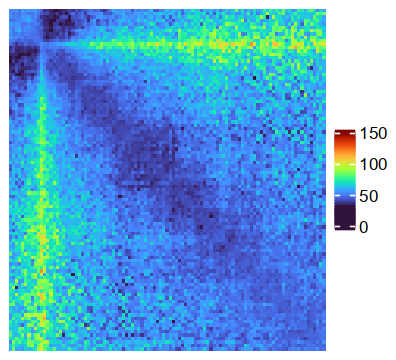

In [8]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(h.L.RG.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

Warning message:
“`breaks` does not have the same length as `color`. The colors are
interpolated from the minimal to the maximal of `breaks`.”


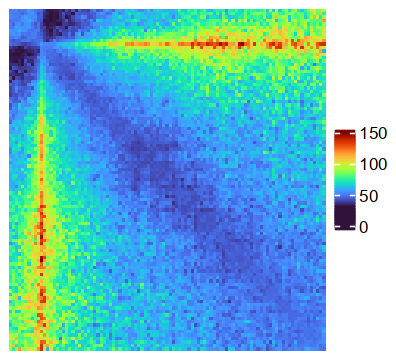

In [9]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(h.L.eN.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(h.R.RG.mat[100:201,100:201],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(h.R.eN.mat[100:201,100:201],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

## macaca

In [ ]:
rh.L <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Left.startbin.2rheMac.sort.midsites.50kb.bin") %>% 
select(V2,V3,V4) %>% distinct() %>%
mutate(V3=V3-500000,V4=V3+10000000)

rh.R <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Right.endbin.2rheMac.sort.midsites.50kb.bin") %>% 
select(V2,V3,V4) %>% distinct() %>%
mutate(V4=V4+500000,V3=V4-10000000) 

In [ ]:
rh.L.RG.mat <- getStripesPlotDF(rh.L,rhRG.50.mat)
rh.R.RG.mat <- getStripesPlotDF(rh.R,rhRG.50.mat)
rh.L.eN.mat <- getStripesPlotDF(rh.L,rheN.50.mat)
rh.R.eN.mat <- getStripesPlotDF(rh.R,rheN.50.mat)

In [ ]:
saveRDS(rh.L.RG.mat,"./stripes.mat/macacaBrain_1K_h.L.RG.mat.RDS")
saveRDS(rh.R.RG.mat,"./stripes.mat/macacaBrain_1K_h.R.RG.mat.RDS")
saveRDS(rh.L.eN.mat,"./stripes.mat/macacaBrain_1K_h.L.eN.mat.RDS")
saveRDS(rh.R.eN.mat,"./stripes.mat/macacaBrain_1K_h.R.eN.mat.RDS")

In [ ]:
ComplexHeatmap::pheatmap(rh.L.RG.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
ComplexHeatmap::pheatmap(rh.L.eN.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(30,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
ComplexHeatmap::pheatmap(rh.R.RG.mat[100:201,100:201],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(20,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
ComplexHeatmap::pheatmap(rh.R.eN.mat[100:201,100:201],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(20,150),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

## human specific

In [ ]:
hs.L <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Left.startbin.human.specific") %>% 
select(V1,V2,V3) %>% distinct() %>%
mutate(V2=V2-500000,V3=V2+10000000)

hs.R <- read.table("/lustre/user/liclab/jialm/Project/SCOPEC/analysis/DYnamic.comp.and.peak/humanBrian_PFC/RES/stripes.se_scaller/all.RG.eN.stripes.edgeR.FDR0.05_log2FC0.5.Up.Right.endbin.human.specific") %>% 
select(V1,V2,V3) %>% distinct() %>%
mutate(V3=V3+500000,V2=V3-10000000) 

In [ ]:
hs.L.RG.mat <- getStripesPlotDF(hs.L,hRG.50.mat)
hs.R.RG.mat <- getStripesPlotDF(hs.R,hRG.50.mat)
hs.L.eN.mat <- getStripesPlotDF(hs.L,heN.50.mat)
hs.R.eN.mat <- getStripesPlotDF(hs.R,heN.50.mat)

In [ ]:
saveRDS(hs.L.RG.mat,"./stripes.mat/humanBrain_1K_hs.L.RG.mat.RDS")
saveRDS(hs.R.RG.mat,"./stripes.mat/humanBrain_1K_hs.R.RG.mat.RDS")
saveRDS(hs.L.eN.mat,"./stripes.mat/humanBrain_1K_hs.L.eN.mat.RDS")
saveRDS(hs.R.eN.mat,"./stripes.mat/humanBrain_1K_hs.R.eN.mat.RDS")

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(hs.L.RG.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(60,200),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(hs.L.eN.mat[1:101,1:101],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(60,200),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(hs.R.RG.mat[101:200,101:200],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(60,200),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 

In [ ]:
options(repr.plot.width=3.3,repr.plot.height=3)
ComplexHeatmap::pheatmap(hs.R.eN.mat[101:200,101:200],fontsize = 8,
                         #color=colours,
                         color=viridis::turbo(500,direction = 1),
                         #left_annotation = row_ha,
                         #show_rownames = F,
                         breaks=c(60,200),
                         cluster_cols = F,cluster_rows = F,border = FALSE) 